In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

In [2]:
def split_value_diff(df):
    df.xG = df.xG.apply(lambda x: float(re.split("[+ | -]", x)[0]))
    df.xGA = df.xGA.apply(lambda x: float(re.split("[+ | -]", x)[0]))
    df.xPTS = df.xPTS.apply(lambda x: float(re.split("[+ | -]", x)[0]))
    df["xg_g_diff"] = df.xG - df.G
    df["xga_ga_diff"] = df.xGA - df.GA
    df["xpts_pts_diff"] = df.xPTS - df.PTS

In [44]:
# разделение xg и разницы между ожидаемым значением и реальным
for year in "45678":
    path = f"xg_data/201{year}.csv"
    df = pd.read_csv(path)
    split_value_diff(df)
    df.to_csv(path, index=None)

In [3]:
# данные взяты с сайта understat.com 

xg_table_2014 = pd.read_csv("xg_data/2014.csv")
xg_table_2015 = pd.read_csv("xg_data/2015.csv")
xg_table_2016 = pd.read_csv("xg_data/2016.csv")
xg_table_2017 = pd.read_csv("xg_data/2017.csv")
xg_table_2018 = pd.read_csv("xg_data/2018.csv")

In [4]:
# http://www.football-data.co.uk/englandm.php
table_2014 = pd.read_csv("data/14-15.csv")
table_2015 = pd.read_csv("data/15-16.csv")
table_2016 = pd.read_csv("data/16-17.csv")
table_2017 = pd.read_csv("data/17-18.csv")
table_2018 = pd.read_csv("data/18-19.csv")

In [5]:
table_2018.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [6]:
def plot_home_away_win(df, season):
    COLOR = "blue"
    plt.figure(figsize=[30, 20])
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['xtick.labelsize'] = 40
    
    newdf = df.join(pd.get_dummies(df.FTR))
    
    HomeTeamWin = newdf.groupby("HomeTeam").H.mean()
    AwayTeamWin = newdf.groupby("AwayTeam").A.mean()
    
    TeamWin = pd.DataFrame()
    TeamWin["Team"] = HomeTeamWin.index
    TeamWin["HomeWin"] = HomeTeamWin.values
    TeamWin["AwayWin"] = AwayTeamWin.values
    
    width = 0.4
    x = np.arange(20)
    plt.bar(x, TeamWin.HomeWin, width, label="Home win %")
    plt.bar(x + width-0.1, TeamWin.AwayWin, width, label="Away win %")
    plt.xticks(x + width / 2, (TeamWin["Team"]), rotation="vertical")
    plt.legend(prop = {"size": 25})
    plt.title(f"Win percentage for each club (Home & Away) {season}-{season+1}", fontsize=40)

In [7]:
%matplotlib inline

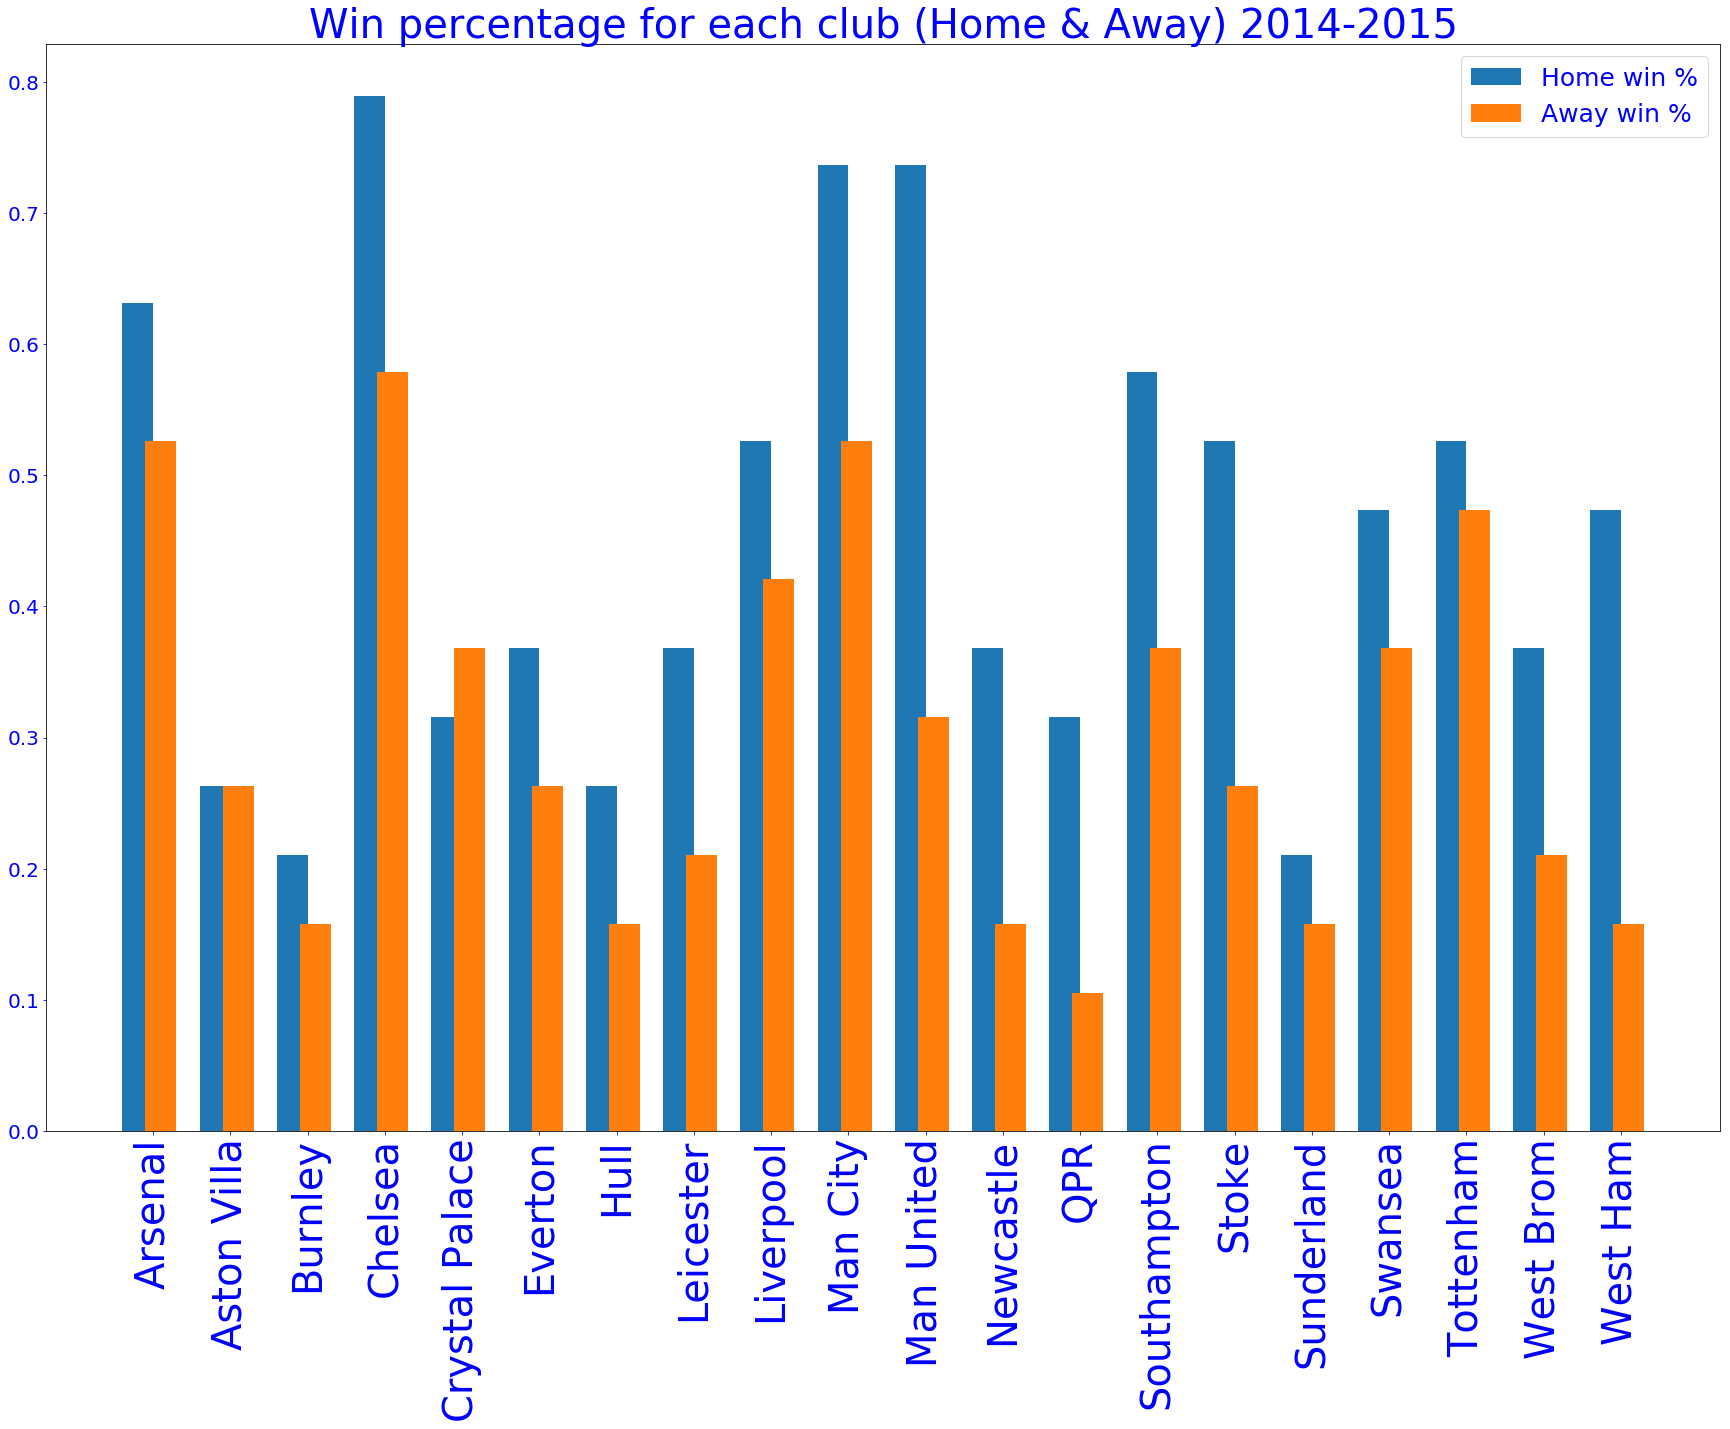

In [8]:
plot_home_away_win(table_2014, 2014)

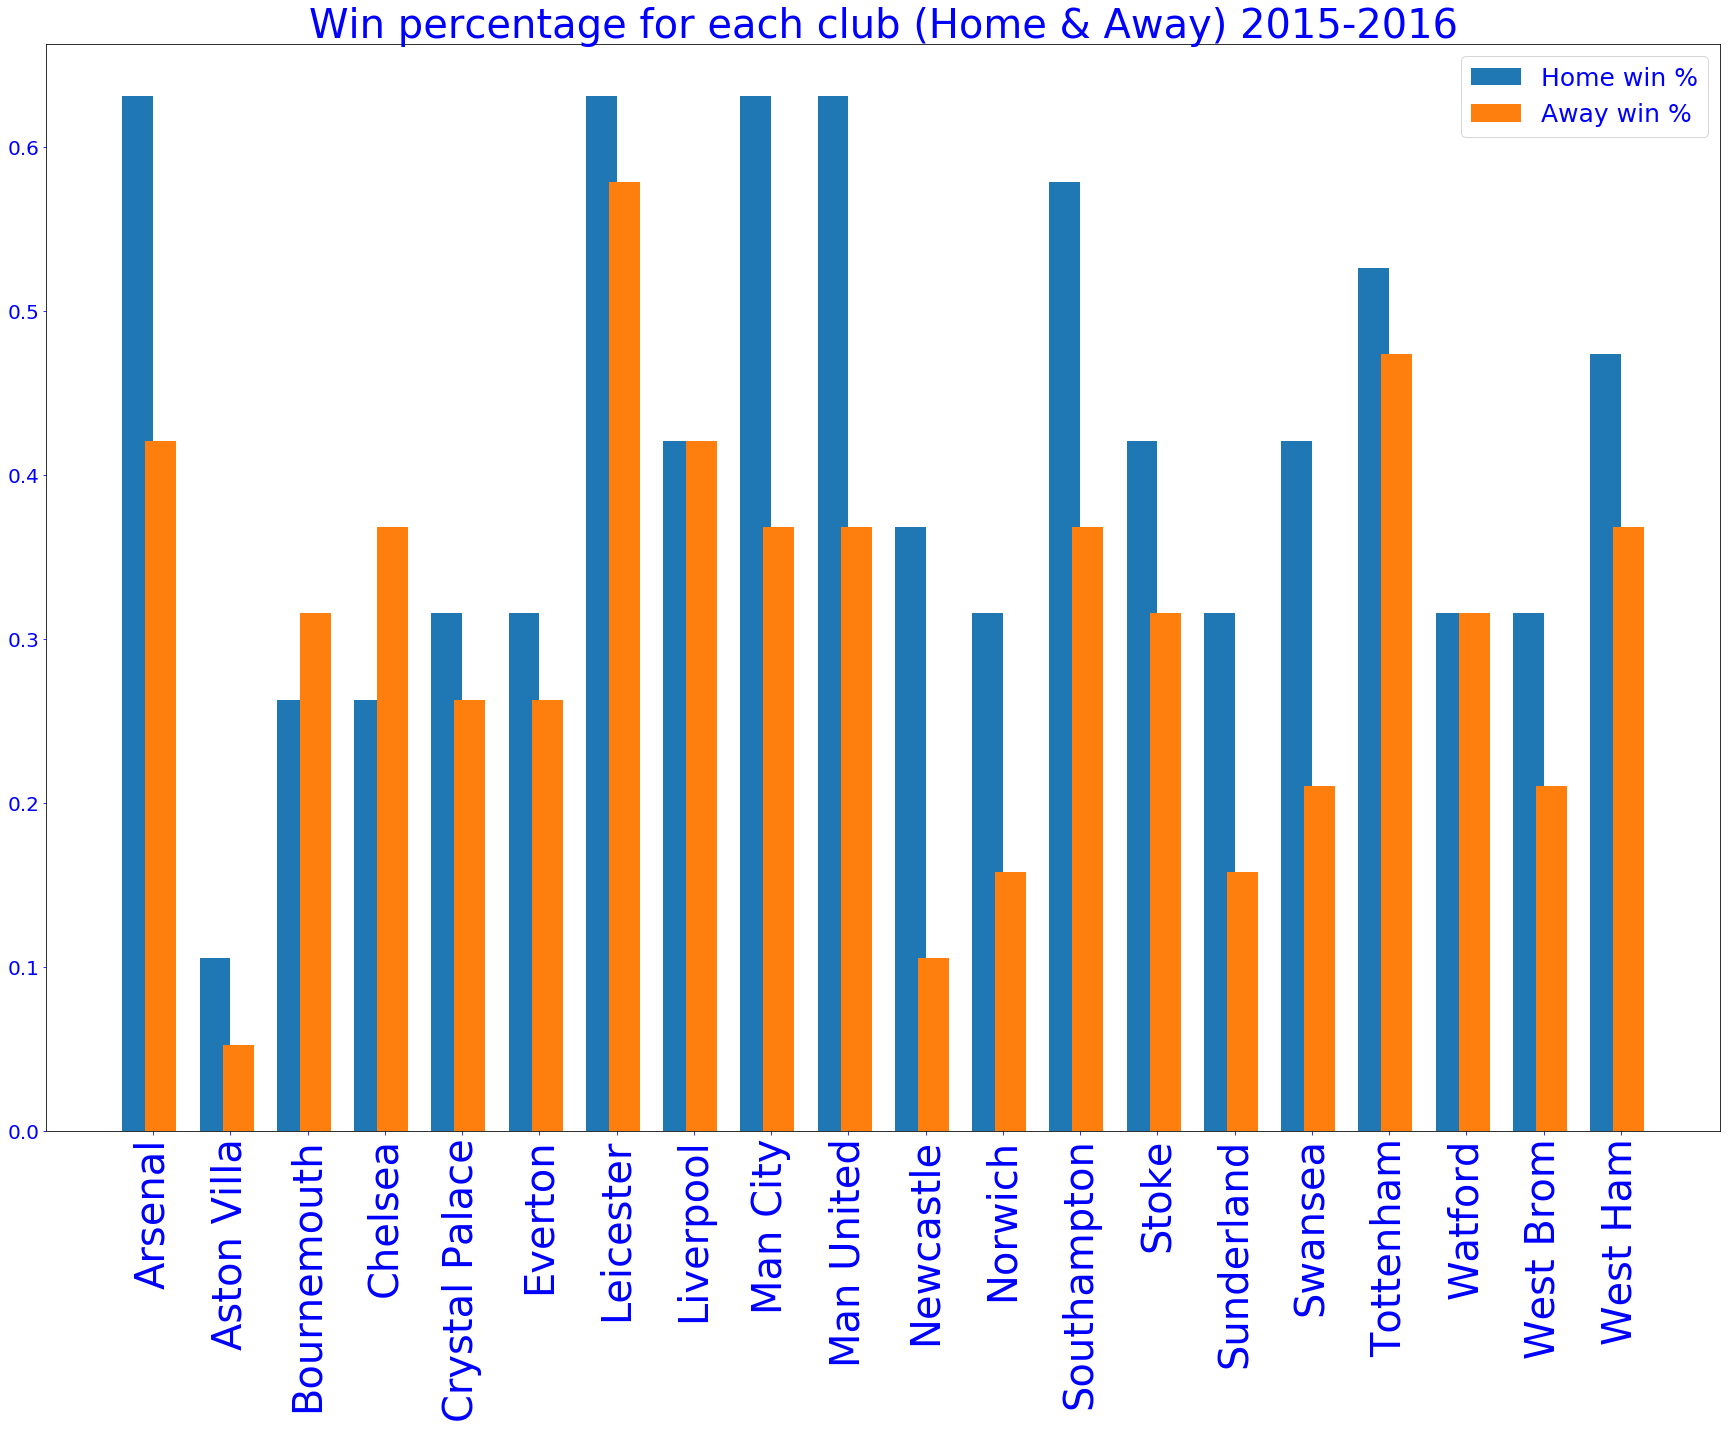

In [9]:
plot_home_away_win(table_2015, 2015)

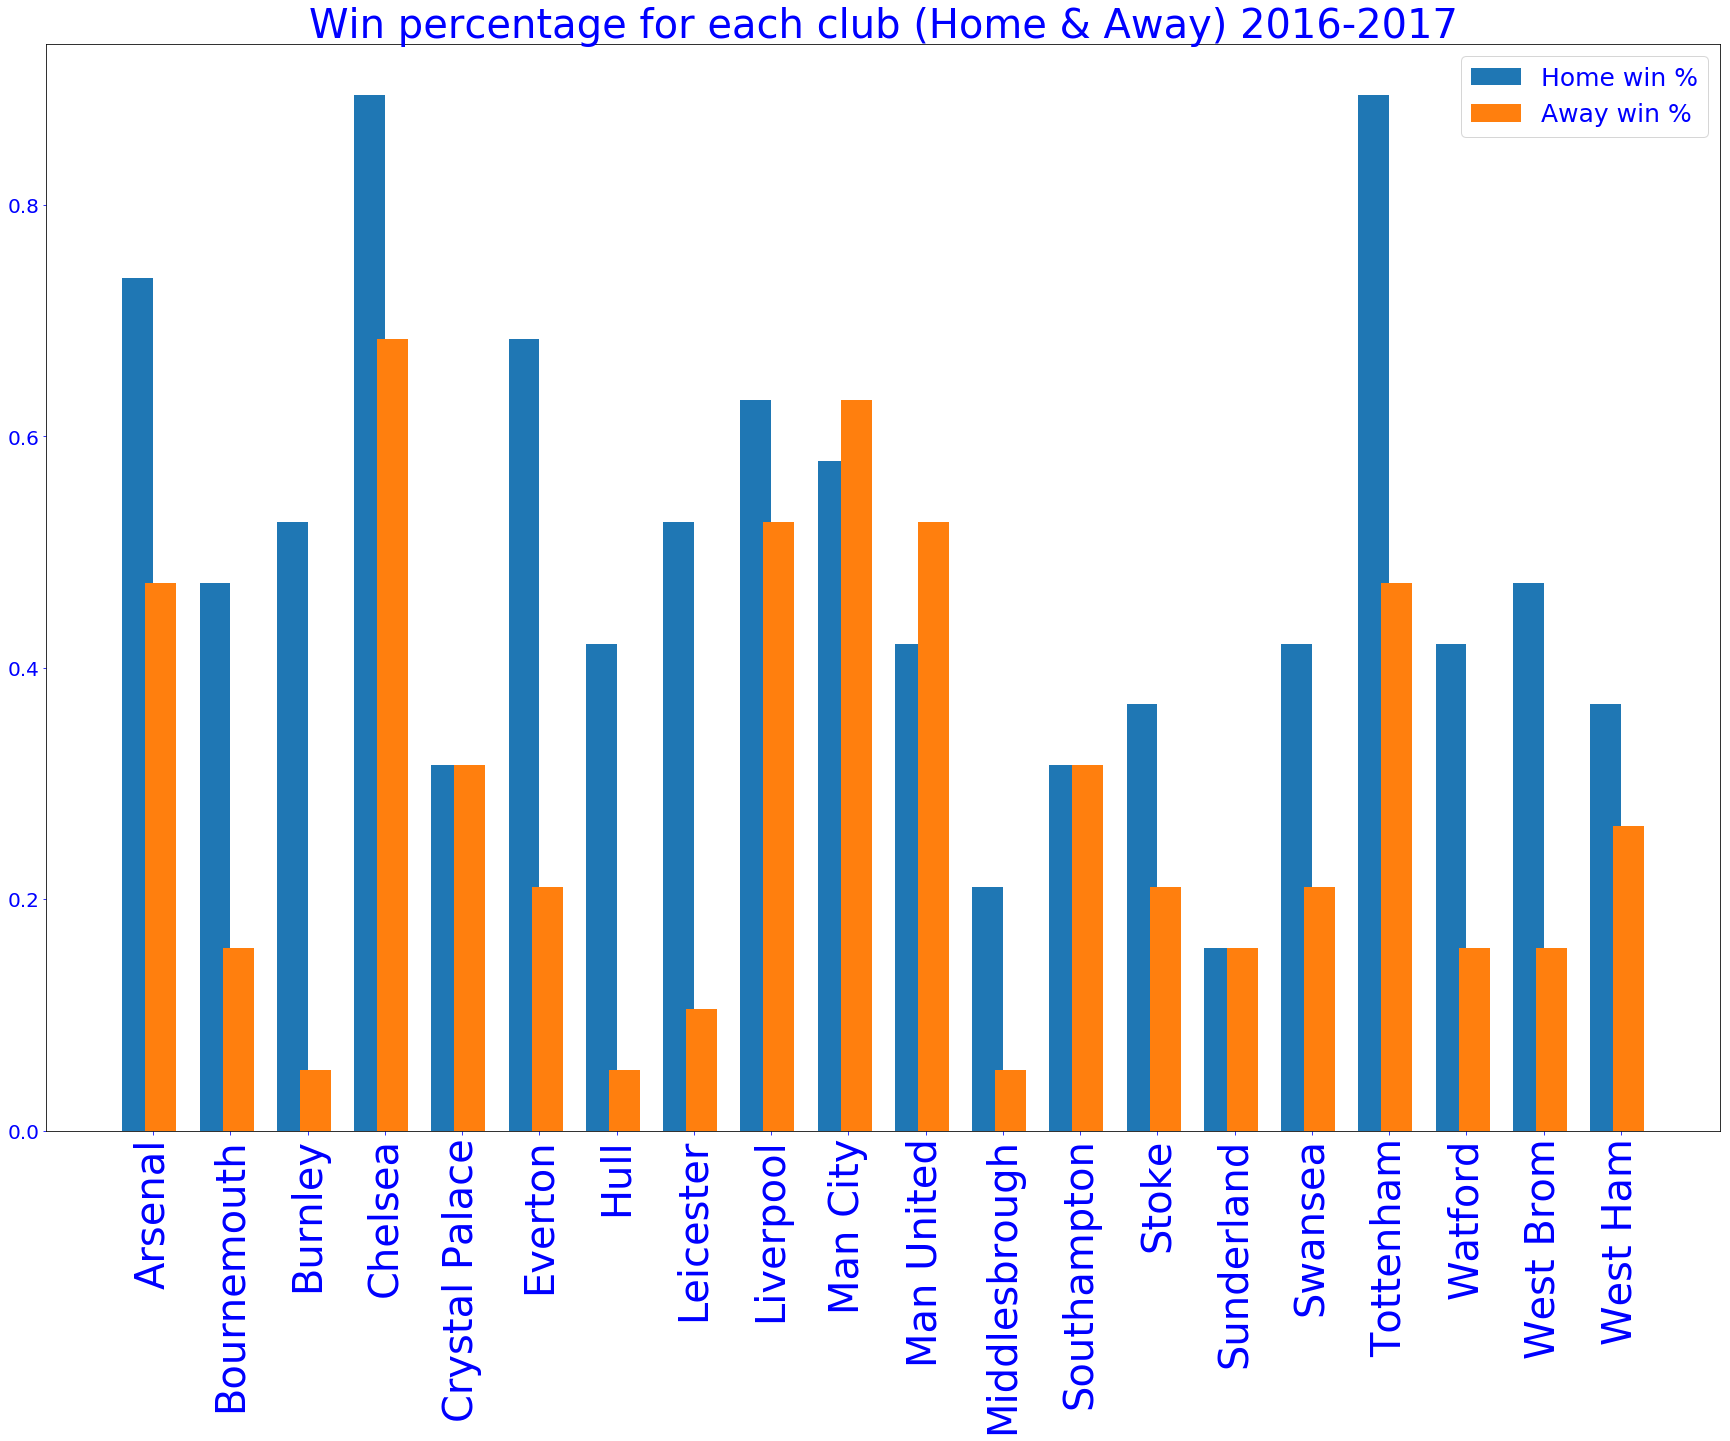

In [10]:
plot_home_away_win(table_2016, 2016)

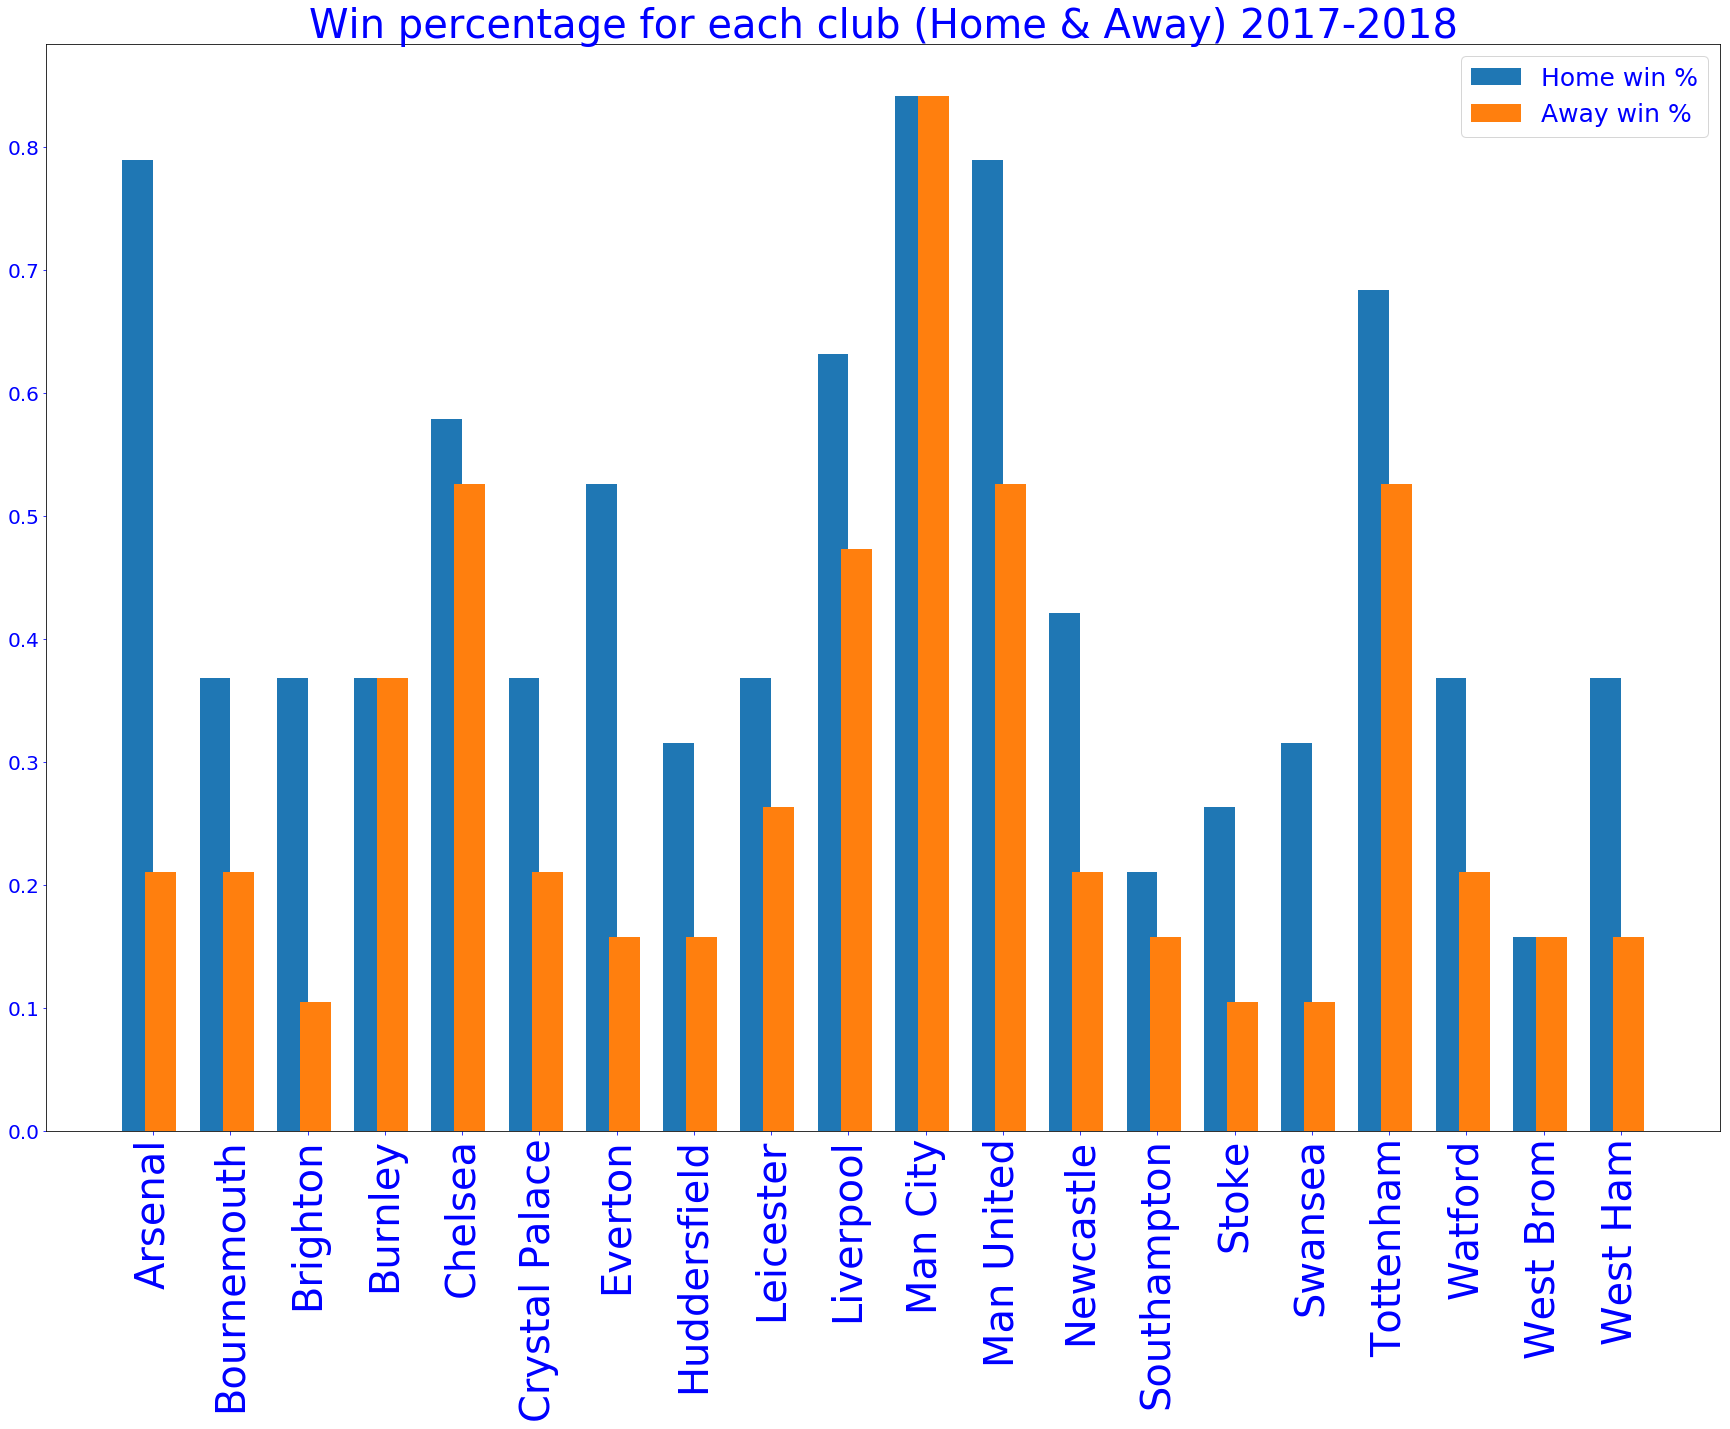

In [11]:
plot_home_away_win(table_2017, 2017)

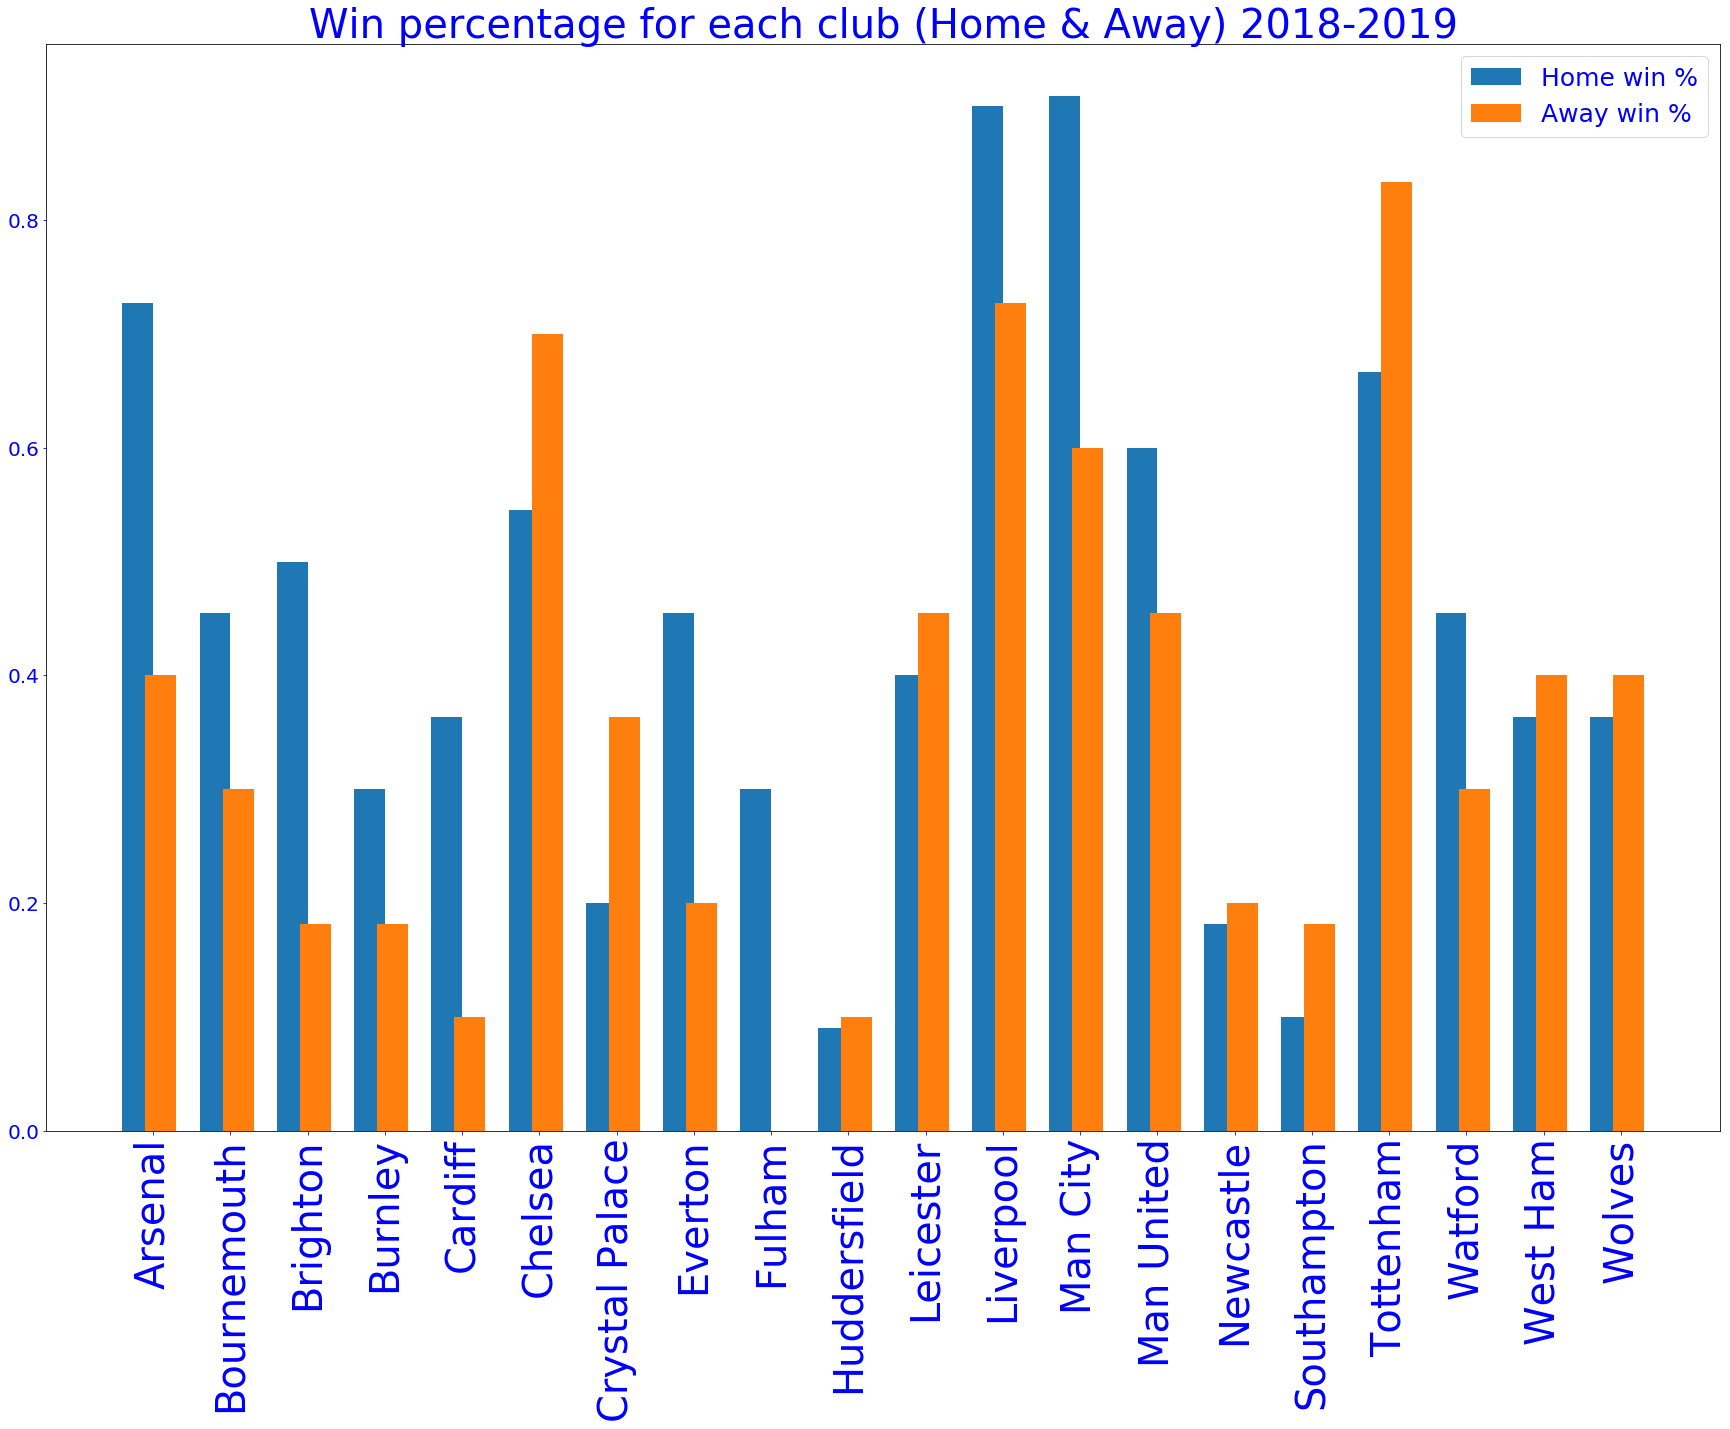

In [23]:
plot_home_away_win(table_2018, 2018)

In [33]:
# пустая строка
table_2014.drop(table_2014[np.isnan(table_2014.FTHG)].index[0], inplace=True)

In [52]:
def plot_home_away_goals(df):

    plt.figure(figsize=(12,6))
    plt.rcParams['xtick.labelsize'] = 20

    sns.kdeplot(data=df.FTHG, shade=True, color="r", label="Home goals")
    sns.kdeplot(data=df.FTAG, shade=True, color="b", label="Away goals")

    plt.axvline(df.FTHG.mean(),linestyle = "dashed", color="r",
                label="Home goals mean")
    plt.axvline(df.FTAG.mean(),linestyle = "dashed", color="b",
            label="away goals mean")
    
    plt.title("Distribution of home and away goals")
    plt.xticks(ticks=np.arange(0, 12))

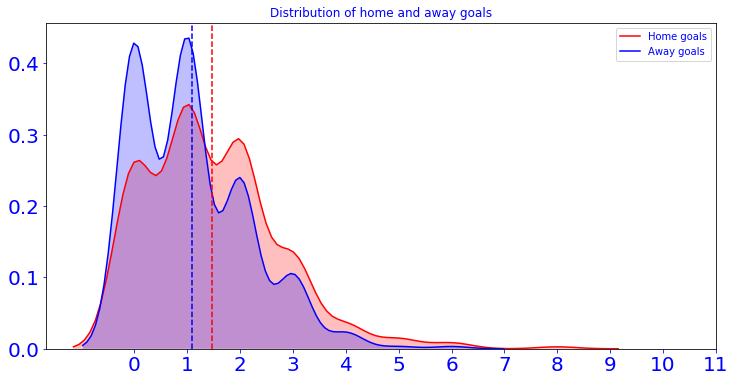

In [53]:
plot_home_away_goals(table_2014)

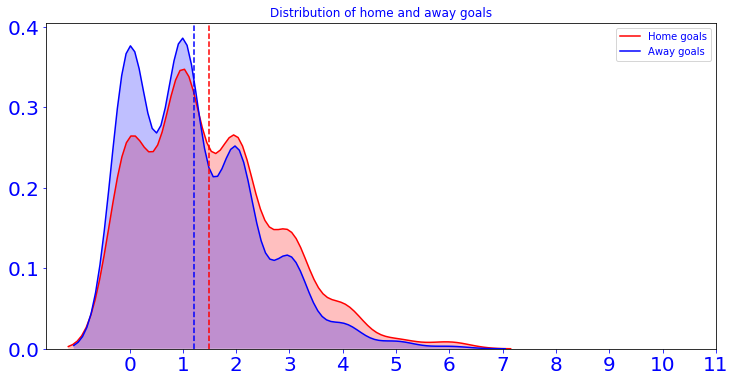

In [54]:
plot_home_away_goals(table_2015)

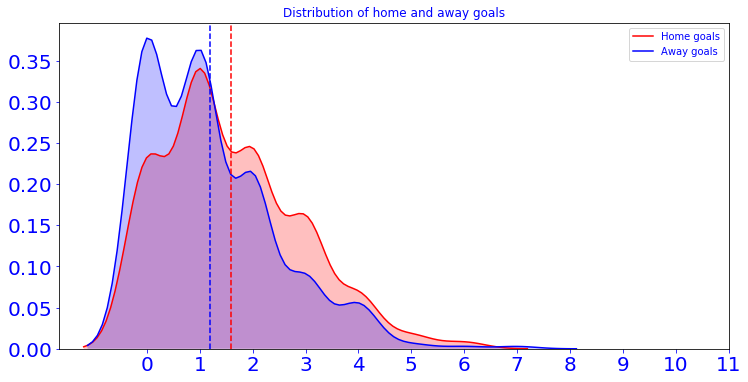

In [55]:
plot_home_away_goals(table_2016)

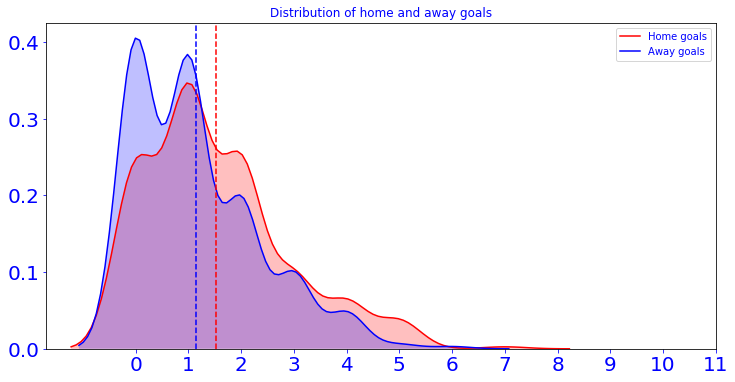

In [56]:
plot_home_away_goals(table_2017)

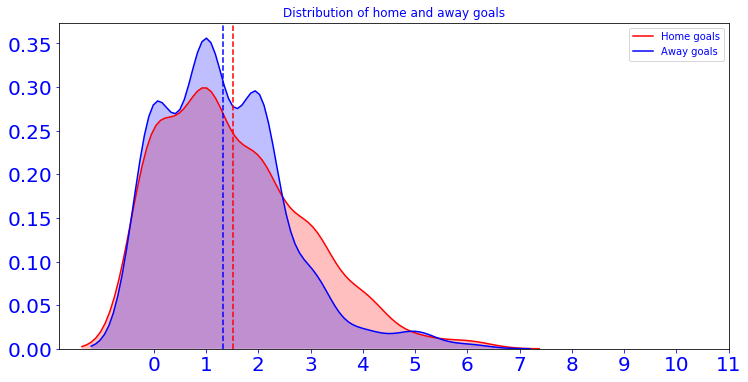

In [57]:
plot_home_away_goals(table_2018)

In [104]:
last_col = 23
all_seasons = pd.concat([table_2014.drop(columns=table_2014.columns[last_col:]), 
                         table_2015.drop(columns=table_2015.columns[last_col:]), 
                         table_2016.drop(columns=table_2016.columns[last_col:]), 
                         table_2017.drop(columns=table_2017.columns[last_col:]), 
                         table_2018.drop(columns=table_2018.columns[last_col:])])

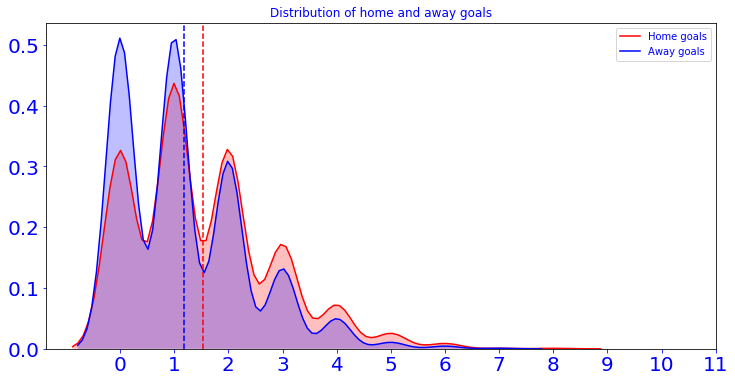

In [93]:
plot_home_away_goals(all_seasons)

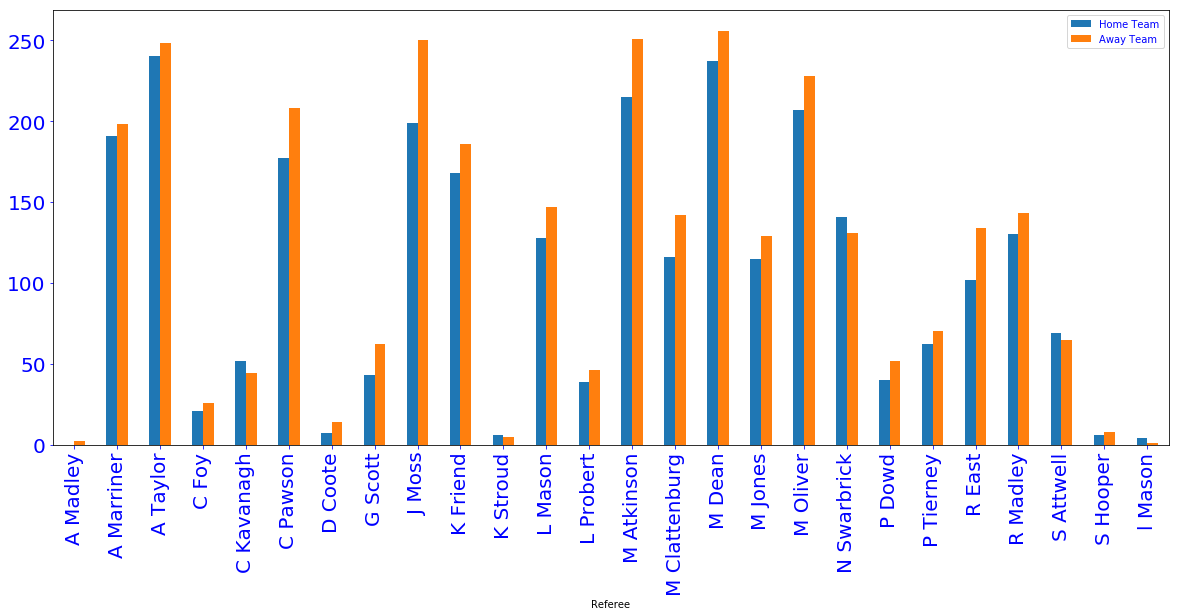

In [140]:
yellow_cards = pd.concat([all_seasons.groupby("Referee").HY.sum(),
                          all_seasons.groupby("Referee").AY.sum()], 
                        axis=1)
yellow_cards.columns = ["Home Team", "Away Team"]
yellow_cards.plot(kind="bar", figsize=[20, 8]);

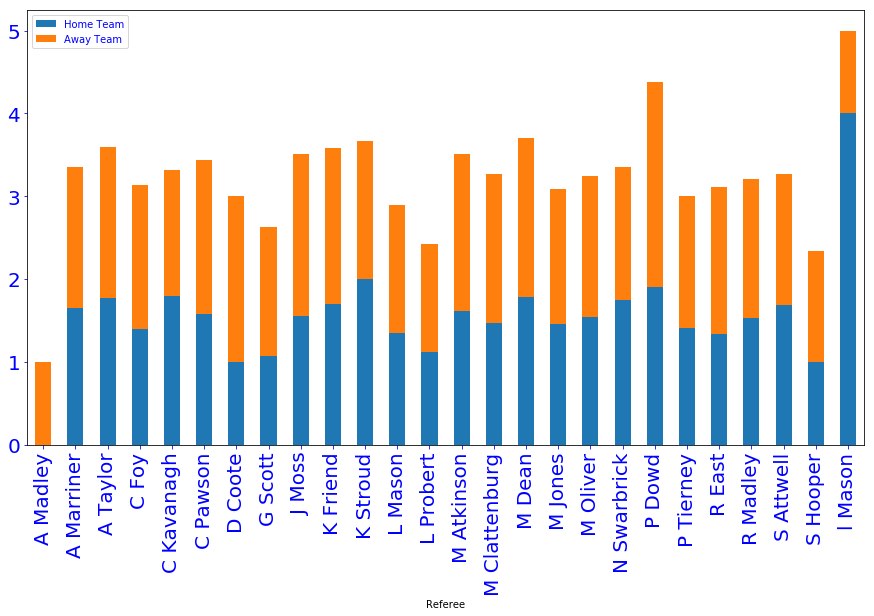

In [139]:
mean_yellow_cards = pd.concat([all_seasons.groupby("Referee").HY.mean(),
                               all_seasons.groupby("Referee").AY.mean()], 
                            axis=1)
mean_yellow_cards.columns = ["Home Team", "Away Team"]
mean_yellow_cards.plot(kind="bar", stacked=True, figsize=[15, 8]);

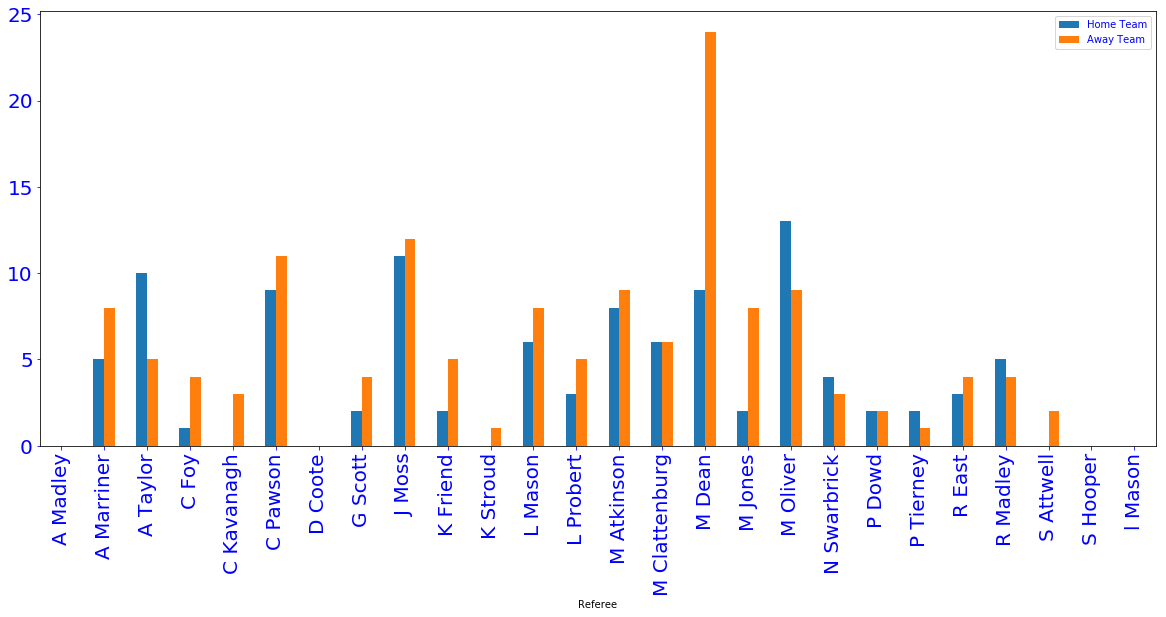

In [142]:
red_cards = pd.concat([all_seasons.groupby("Referee").HR.sum(),
                          all_seasons.groupby("Referee").AR.sum()], 
                        axis=1)
red_cards.columns = ["Home Team", "Away Team"]
red_cards.plot(kind="bar", figsize=[20, 8]);

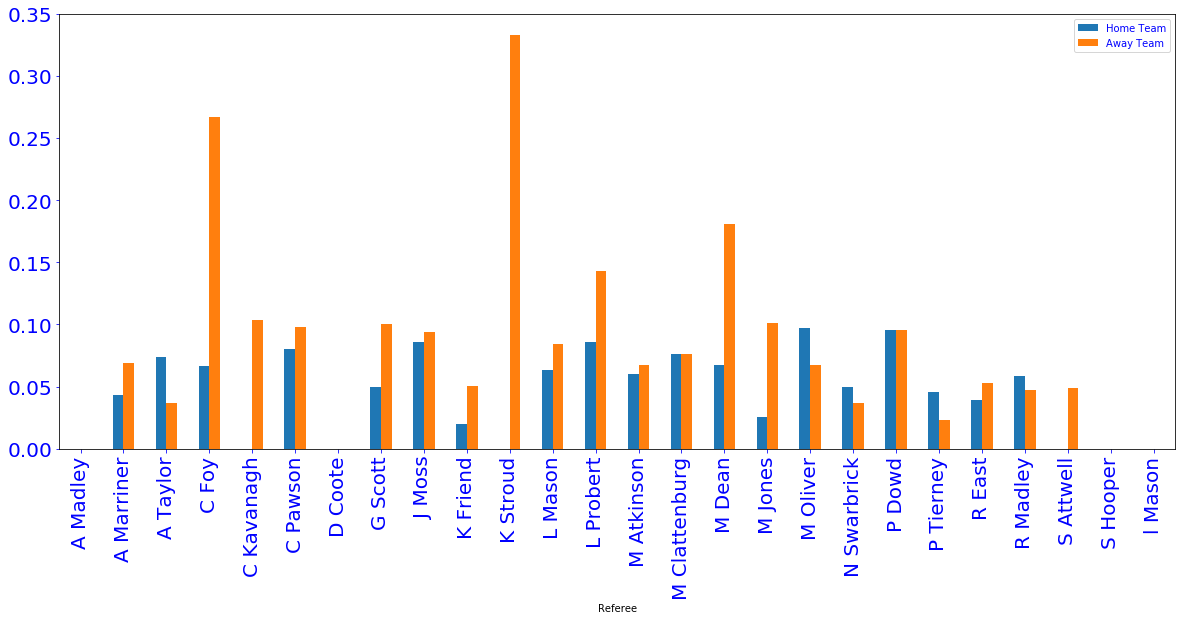

In [143]:
mean_red_cards = pd.concat([all_seasons.groupby("Referee").HR.mean(),
                          all_seasons.groupby("Referee").AR.mean()], 
                        axis=1)
mean_red_cards.columns = ["Home Team", "Away Team"]
mean_red_cards.plot(kind="bar", figsize=[20, 8]);

In [147]:
all_seasons = all_seasons.join(pd.get_dummies(all_seasons.FTR))

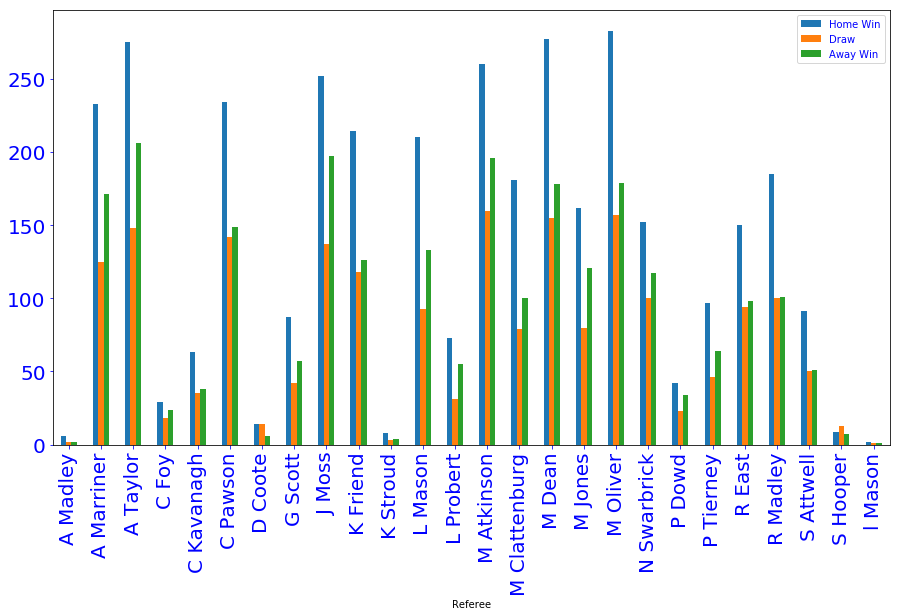

In [155]:
match_result = pd.concat([all_seasons.groupby("Referee").H.sum(),
                        all_seasons.groupby("Referee").D.sum(),
                        all_seasons.groupby("Referee").A.sum()],
                       axis=1)
match_result.columns = ["Home Win", "Draw", "Away Win"]
match_result.plot(kind="bar", figsize=[15, 8]);

добавить группировку по клубам